Project Title: Climate Risk & Disaster Management

Project Statement: During disasters, people often turn to social media to share what’s happening. But not every post is actually about the disaster, and going through all of them by hand takes a lot of time. That’s why we need an automated system that can quickly pick out disaster-related tweets, helping with faster warnings and response.

Description: During disasters, people actively share updates on social media, but not all posts are relevant or useful for emergency response. Manually filtering such a huge amount of data is time-consuming and inefficient. This project develops an AI/ML-based classifier that can automatically detect whether a tweet is disaster-related or not. Natural Language Processing (NLP) techniques are applied to clean and analyse the text, and a Naive Bayes model is used for classification. The system aims to provide faster identification of relevant information, which can support early warnings, quick decision-making, and effective disaster management.


---



In [1]:
# Essential Libraries
import pandas as pd
import numpy as np

# Machine Learning (Sklearn)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train.csv


In [3]:
# Load dataset into DataFrame
df = pd.read_csv("train.csv")


In [4]:
# Dataset info
print("\n--- Dataset Info ---")
print(df.info())

# Statistical summary
print("\n--- Dataset Description ---")
print(df.describe())

# Missing values check
print("\n--- Missing Values ---")
print(df.isnull().sum())



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None

--- Dataset Description ---
                 id      target
count   7613.000000  7613.00000
mean    5441.934848     0.42966
std     3137.116090     0.49506
min        1.000000     0.00000
25%     2734.000000     0.00000
50%     5408.000000     0.00000
75%     8146.000000     1.00000
max    10873.000000     1.00000

--- Missing Values ---
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


In [5]:
# Show first 10 rows
df.head(10)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


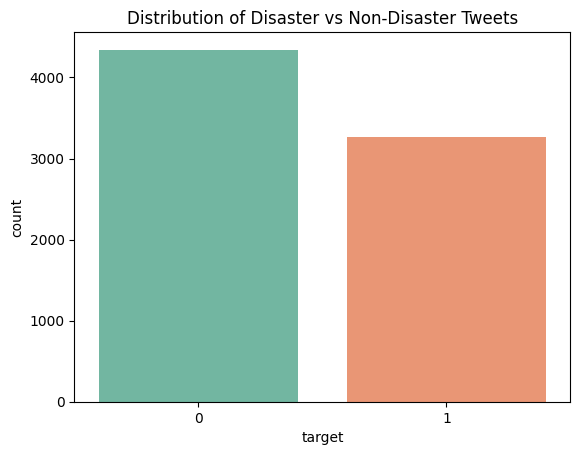

In [7]:
# EDA
# Univariate Analysis
sns.countplot(x="target", data=df, hue="target", palette="Set2", legend=False)
plt.title("Distribution of Disaster vs Non-Disaster Tweets")
plt.show()


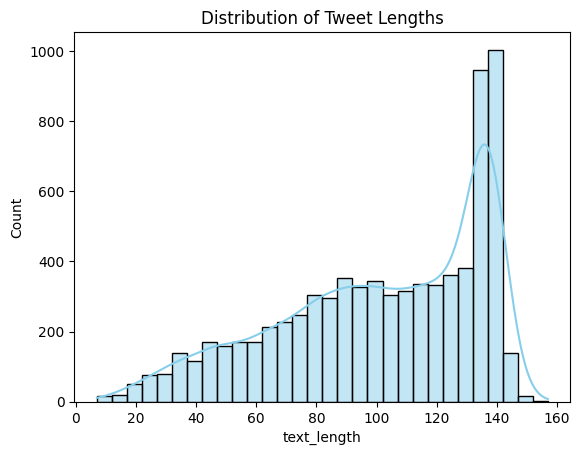

In [8]:
# EDA
# Univariate Analysis (tweet length)
df['text_length'] = df['text'].apply(len)

sns.histplot(df['text_length'], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Tweet Lengths")
plt.show()


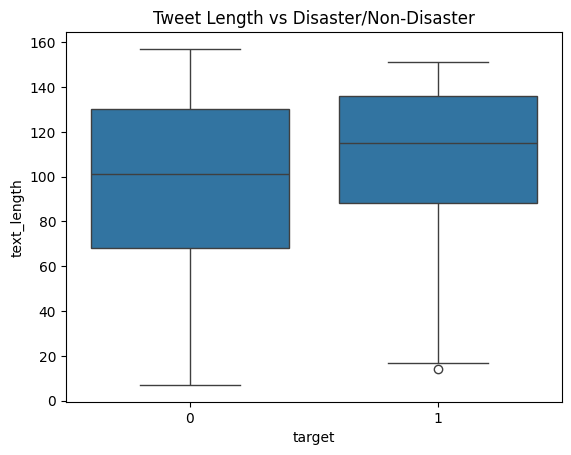

In [9]:
# EDA
# Bivariate Analysis
df['text_length'] = df['text'].apply(len)

sns.boxplot(x="target", y="text_length", data=df)
plt.title("Tweet Length vs Disaster/Non-Disaster")
plt.show()


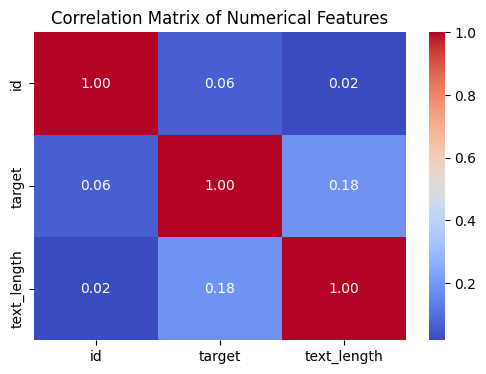

In [10]:
# EDA
# Correlation Matrix
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


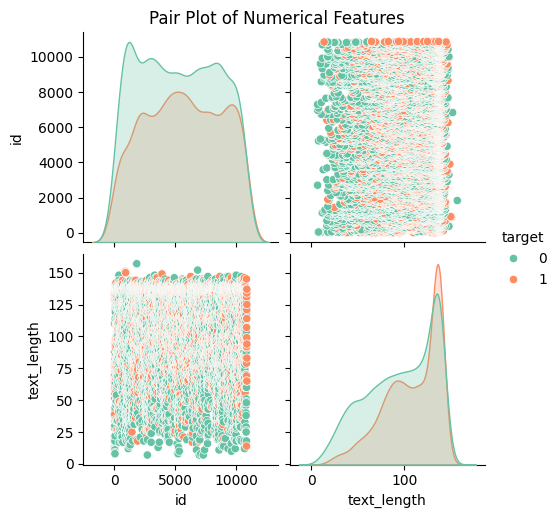

In [11]:
# Multivariate Analysis
# Pair Plot of Numerical Features
sns.pairplot(df[["id", "text_length", "target"]], hue="target", palette="Set2")
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()


In [13]:
# Data Processing
df['text'] = df['text'].fillna('')


In [14]:
# Data Transformation
# Convert text to numeric
cv = CountVectorizer(stop_words='english')
X = cv.fit_transform(df['text'])   # Features


In [15]:
# Feature and Target selection
y = df['target']


In [16]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Show dataset sizes
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (6090, 21363)
Test set size: (1523, 21363)


In [18]:
# First 5 rows of traun and test set
X_train_df = pd.DataFrame(X_train.toarray())
X_test_df = pd.DataFrame(X_test.toarray())

# Show first 5 rows
print("First 5 rows of X_train:")
display(X_train_df.head())

print("\nFirst 5 rows of X_test:")
display(X_test_df.head())


First 5 rows of X_train:


,0,1,2,3,4,5,6,7,8,9,...,21353,21354,21355,21356,21357,21358,21359,21360,21361,21362
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



First 5 rows of X_test:


,0,1,2,3,4,5,6,7,8,9,...,21353,21354,21355,21356,21357,21358,21359,21360,21361,21362
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
